# DIFF only with exclusion

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import display_html
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
output_path = './output/consis_on_exc/'
input_path = './output/exclude/'
try:
    _=os.listdir(output_path)
except:
    os.mkdir(output_path)
from data_loader_exclude import load_data_default
#clfs = [i for i in os.listdir('./output/exclude/') if 'csv' not in i]
clfs = ['DA_lgbm_t_series', 'DA_ADA_t_series', 'DA_rf_t_series', 'DA_gboost_t_series']
print(clfs)

['DA_lgbm_t_series', 'DA_ADA_t_series', 'DA_rf_t_series', 'DA_gboost_t_series']


In [2]:
load_data = load_data_default()
df,y = load_data.load_train_data()
print(df.shape,df.loc[y==1].shape)
i,_ =df.shape
j,_ =df.loc[y==1].shape
print(f'Ratio of default is {round(j/i,3)}\n')

(22500, 24) (4977, 24)
Ratio of default is 0.221



In [4]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from data_loader_default import load_data_default


def my_score(y_train,y_pred):
    accuracy = accuracy_score(y_train,y_pred)
    pre_score = precision_score(y_train,y_pred)
    rec_score = recall_score(y_train,y_pred)
    f_score = f1_score(y_train,y_pred)

    return [round(accuracy,4), round(pre_score,4), round(rec_score ,4), round(f_score,4)]




X_train,y_train,X_val,y_val = 0,0,0,0
load_data = load_data_default()


In [5]:
DA_score_df_by_clf = []
for clf in clfs:
    if 'gboost' not in clf:
        output_path = f'./output/{clf}/'
        score_dataframes = []
        for num,(X_train ,y_train, X_val, y_val) in enumerate(load_data.yield_data()):
            pred_val = pd.read_csv(output_path+'/aug_3/'+str(num)+'/pred_val.csv',index_col=0)
            score_val = pd.read_csv(output_path+'/aug_3/'+str(num)+'/score_val.csv',index_col=0)
            scores =pd.Series([clf]+my_score(y_val,pred_val)+[round(roc_auc_score(y_val,score_val),4)]
                                ,index=['clf','acc','prec','rec','f1','roc_auc'])
            score_dataframes.append(scores)

        evals_frame = pd.concat(score_dataframes, axis=1).transpose()
        DA_score_df_by_clf.append(evals_frame)
NDA_score_df_by_clf = []
for clf in clfs:
    if 'gboost' not in clf:
        output_path = f'./output/{clf}/'
        score_dataframes = []
        for num,(X_train ,y_train, X_val, y_val) in enumerate(load_data.yield_data()):
            pred_val = pd.read_csv(output_path+'/non_aug/'+str(num)+'/pred_val.csv',index_col=0)
            score_val = pd.read_csv(output_path+'/non_aug/'+str(num)+'/score_val.csv',index_col=0)
            scores =pd.Series([clf]+my_score(y_val,pred_val)+[round(roc_auc_score(y_val,score_val),4)]
                                ,index=['clf','acc','prec','rec','f1','roc_auc'])
            score_dataframes.append(scores)

        evals_frame = pd.concat(score_dataframes, axis=1).transpose()
        NDA_score_df_by_clf.append(evals_frame)
clfss = clfs.copy()
clfss.pop(-1)
for i,clf in enumerate(clfss):
    df1 = DA_score_df_by_clf[i]
    df2 = NDA_score_df_by_clf[i]
    df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption(f'{clf}  Data Augmented')
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption(f'{clf}  Original')
    display_html(df1_styler._repr_html_()+'\xa0'*8+df2_styler._repr_html_(), raw=True)
    print('\n\n\n')

,clf,acc,prec,rec,f1,roc_auc
0,DA_lgbm_t_series,0.793100,0.537100,0.465300,0.498700,0.750600
1,DA_lgbm_t_series,0.791300,0.532600,0.459300,0.493300,0.744100
2,DA_lgbm_t_series,0.794400,0.542500,0.449200,0.491500,0.751000
3,DA_lgbm_t_series,0.787300,0.521400,0.477900,0.498700,0.745000
4,DA_lgbm_t_series,0.804900,0.571800,0.471900,0.517100,0.769900
,clf,acc,prec,rec,f1,roc_auc
0,DA_lgbm_t_series,0.824000,0.722100,0.331700,0.454500,0.776900
1,DA_lgbm_t_series,0.818000,0.697300,0.312600,0.431600,0.768100
2,DA_lgbm_t_series,0.818400,0.696000,0.317600,0.436200,0.780100
3,DA_lgbm_t_series,0.820000,0.696200,0.331300,0.449000,0.769200


,clf,acc,prec,rec,f1,roc_auc
0,DA_ADA_t_series,0.782900,0.508900,0.518600,0.513700,0.749100
1,DA_ADA_t_series,0.792400,0.537200,0.442200,0.485100,0.743700
2,DA_ADA_t_series,0.780000,0.502600,0.486400,0.494400,0.745100
3,DA_ADA_t_series,0.779800,0.502400,0.522100,0.512100,0.747500
4,DA_ADA_t_series,0.800900,0.562200,0.453800,0.502200,0.766600
,clf,acc,prec,rec,f1,roc_auc
0,DA_ADA_t_series,0.823600,0.728900,0.321600,0.446300,0.754800
1,DA_ADA_t_series,0.818700,0.696700,0.318600,0.437200,0.753200
2,DA_ADA_t_series,0.818200,0.698900,0.312600,0.431900,0.750000
3,DA_ADA_t_series,0.818200,0.680900,0.336300,0.450300,0.760700


,clf,acc,prec,rec,f1,roc_auc
0,DA_rf_t_series,0.796000,0.539900,0.523600,0.531600,0.755900
1,DA_rf_t_series,0.794400,0.538100,0.496500,0.516500,0.751600
2,DA_rf_t_series,0.794000,0.538100,0.482400,0.508700,0.755900
3,DA_rf_t_series,0.785600,0.515700,0.510000,0.512900,0.748600
4,DA_rf_t_series,0.806200,0.566700,0.529100,0.547200,0.773800
,clf,acc,prec,rec,f1,roc_auc
0,DA_rf_t_series,0.822000,0.683000,0.363800,0.474800,0.778600
1,DA_rf_t_series,0.816000,0.664700,0.338700,0.448700,0.771600
2,DA_rf_t_series,0.810000,0.646400,0.310600,0.419600,0.779200
3,DA_rf_t_series,0.819300,0.666700,0.367500,0.473800,0.769300


In [6]:
pd.concat(DA_score_df_by_clf,axis=0)

,clf,acc,prec,rec,f1,roc_auc
0,DA_lgbm_t_series,0.7931,0.5371,0.4653,0.4987,0.7506
1,DA_lgbm_t_series,0.7913,0.5326,0.4593,0.4933,0.7441
2,DA_lgbm_t_series,0.7944,0.5425,0.4492,0.4915,0.751
3,DA_lgbm_t_series,0.7873,0.5214,0.4779,0.4987,0.745
4,DA_lgbm_t_series,0.8049,0.5718,0.4719,0.5171,0.7699
0,DA_ADA_t_series,0.7829,0.5089,0.5186,0.5137,0.7491
1,DA_ADA_t_series,0.7924,0.5372,0.4422,0.4851,0.7437
2,DA_ADA_t_series,0.78,0.5026,0.4864,0.4944,0.7451
3,DA_ADA_t_series,0.7798,0.5024,0.5221,0.5121,0.7475
4,DA_ADA_t_series,0.8009,0.5622,0.4538,0.5022,0.7666


## DIFF only with excluded samples

In [7]:
from data_loader_exclude import load_data_default as load_data_exclude

In [8]:
load_data =load_data_exclude(exclude=True)

In [9]:
DA_score_df_by_clf = []
for clf in clfs:
        output_path = f'./output/exclude/{clf}/'
        score_dataframes = []
        for num,(X_train ,y_train, X_val, y_val) in enumerate(load_data.yield_data()):
            pred_val = pd.read_csv(output_path+'/aug_3/'+str(num)+'/pred_val.csv',index_col=0)
            score_val = pd.read_csv(output_path+'/aug_3/'+str(num)+'/score_val.csv',index_col=0)
            scores =pd.Series([clf]+my_score(y_val,pred_val)+[round(roc_auc_score(y_val,score_val),4)]
                                ,index=['clf','acc','prec','rec','f1','roc_auc'])
            score_dataframes.append(scores)

        evals_frame = pd.concat(score_dataframes, axis=1).transpose()
        DA_score_df_by_clf.append(evals_frame)
NDA_score_df_by_clf = []
for clf in clfs:
        output_path = f'./output/exclude/{clf}/'
        score_dataframes = []
        for num,(X_train ,y_train, X_val, y_val) in enumerate(load_data.yield_data()):
            pred_val = pd.read_csv(output_path+'/non_aug/'+str(num)+'/pred_val.csv',index_col=0)
            score_val = pd.read_csv(output_path+'/non_aug/'+str(num)+'/score_val.csv',index_col=0)
            scores =pd.Series([clf]+my_score(y_val,pred_val)+[round(roc_auc_score(y_val,score_val),4)]
                                ,index=['clf','acc','prec','rec','f1','roc_auc'])
            score_dataframes.append(scores)

        evals_frame = pd.concat(score_dataframes, axis=1).transpose()
        NDA_score_df_by_clf.append(evals_frame)
for i in range(4):
    df1 = DA_score_df_by_clf[i]
    df2 = NDA_score_df_by_clf[i]
    df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Data Augmented')
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Original')
    display_html(df1_styler._repr_html_()+'\xa0'*8+df2_styler._repr_html_(), raw=True)
    print('\n\n\n')

,clf,acc,prec,rec,f1,roc_auc
0,DA_lgbm_t_series,0.830600,0.494800,0.672800,0.570200,0.873500
1,DA_lgbm_t_series,0.842200,0.521100,0.684200,0.591600,0.880200
2,DA_lgbm_t_series,0.850800,0.540800,0.707000,0.612800,0.890400
3,DA_lgbm_t_series,0.825600,0.484400,0.663400,0.560000,0.862200
4,DA_lgbm_t_series,0.840800,0.518300,0.683200,0.589500,0.873800
,clf,acc,prec,rec,f1,roc_auc
0,DA_lgbm_t_series,0.872400,0.662100,0.482200,0.558000,0.876100
1,DA_lgbm_t_series,0.874800,0.676000,0.480800,0.561900,0.881000
2,DA_lgbm_t_series,0.877100,0.689800,0.480800,0.566600,0.889600
3,DA_lgbm_t_series,0.864100,0.628400,0.458800,0.530400,0.862300


,clf,acc,prec,rec,f1,roc_auc
0,DA_ADA_t_series,0.824400,0.483000,0.728300,0.580800,0.876500
1,DA_ADA_t_series,0.831500,0.497000,0.712700,0.585600,0.872900
2,DA_ADA_t_series,0.837500,0.509500,0.726900,0.599100,0.884600
3,DA_ADA_t_series,0.816500,0.466100,0.664800,0.548000,0.859900
4,DA_ADA_t_series,0.831300,0.497000,0.707400,0.583800,0.876300
,clf,acc,prec,rec,f1,roc_auc
0,DA_ADA_t_series,0.877600,0.743500,0.408300,0.527100,0.876400
1,DA_ADA_t_series,0.872100,0.704700,0.404000,0.513600,0.873000
2,DA_ADA_t_series,0.880200,0.745700,0.429600,0.545100,0.884600
3,DA_ADA_t_series,0.866200,0.674100,0.387800,0.492300,0.859200


,clf,acc,prec,rec,f1,roc_auc
0,DA_rf_t_series,0.839400,0.514600,0.677100,0.584800,0.880600
1,DA_rf_t_series,0.844300,0.525800,0.695600,0.598900,0.876600
2,DA_rf_t_series,0.852400,0.545100,0.705500,0.615000,0.891100
3,DA_rf_t_series,0.827500,0.488200,0.647700,0.556800,0.861500
4,DA_rf_t_series,0.844800,0.528300,0.676100,0.593100,0.877500
,clf,acc,prec,rec,f1,roc_auc
0,DA_rf_t_series,0.877400,0.692800,0.478000,0.565700,0.880100
1,DA_rf_t_series,0.871900,0.670800,0.458000,0.544400,0.876100
2,DA_rf_t_series,0.879500,0.700800,0.486500,0.574300,0.890300
3,DA_rf_t_series,0.866400,0.642000,0.456000,0.533200,0.860700


,clf,acc,prec,rec,f1,roc_auc
0,DA_gboost_t_series,0.830300,0.494600,0.715500,0.584900,0.882600
1,DA_gboost_t_series,0.832500,0.499000,0.719800,0.589400,0.879200
2,DA_gboost_t_series,0.839400,0.513600,0.726900,0.601900,0.888900
3,DA_gboost_t_series,0.815400,0.464000,0.669000,0.548000,0.862900
4,DA_gboost_t_series,0.833200,0.501000,0.708800,0.587100,0.877700
,clf,acc,prec,rec,f1,roc_auc
0,DA_gboost_t_series,0.876900,0.736600,0.409700,0.526500,0.881800
1,DA_gboost_t_series,0.872600,0.704200,0.409700,0.518000,0.876000
2,DA_gboost_t_series,0.879000,0.733200,0.433900,0.545100,0.889400
3,DA_gboost_t_series,0.867900,0.669700,0.414800,0.512300,0.860400


### Augmented case showed significant increase on recall and non augmentation showed similar result and both having similar roc_auc score

In [10]:
prediction_list = []
for num,(X_train ,y_train, X_val, y_val) in enumerate(load_data.yield_data()):
    X_train ,y_train, X_val, y_val = X_train ,y_train, X_val, y_val
    preds_by_clf = [y_val]
    for clf in clfs:
        output_path = f'./output/exclude/{clf}/'
        pred = pd.read_csv(output_path+'/non_aug/'+str(num)+'/pred_val.csv', index_col=0)
        pred.columns = [clf]
        preds_by_clf.append(pred.set_index(y_val.index))
    prediction_list.append(pd.concat(preds_by_clf,axis=1))

pred_df =pd.concat(prediction_list,axis=0)

In [11]:
wrong =pred_df.apply(lambda x :abs(x-pred_df.default), axis=0)
wrong_sum =wrong.sum(axis=1)

Total 4 classifying was executed
Following are analysis of consistently wrong samples


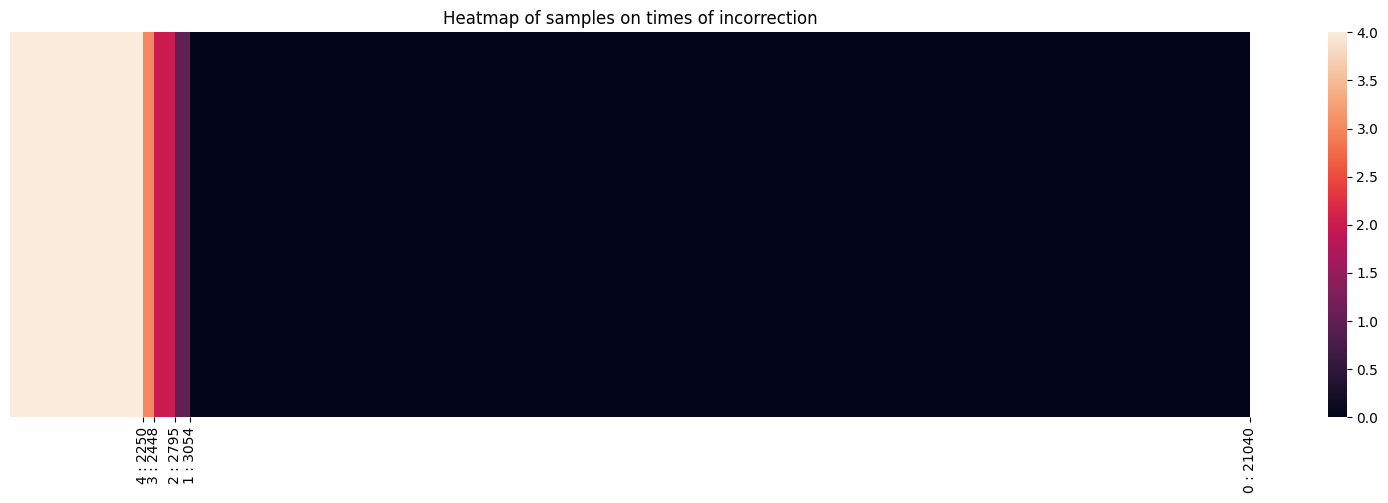

In [12]:
n = wrong.shape[1]-1
print(f'Total {n} classifying was executed\nFollowing are analysis of consistently wrong samples')

import seaborn as sns
fig, ax = plt.subplots(figsize=(20,5))
freq_for_heat =wrong_sum.sort_values(ascending=False).to_numpy().reshape(1,-1)
sns.heatmap(freq_for_heat,vmax=n)
x_ticks =[wrong_sum[wrong_sum>j-1].shape[0] for j in [4,3,2,1,0]]
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{freq} : {count}' for count,freq in zip(x_ticks,[4,3,2,1,0])])
ax.set_yticks([])
ax.set_title('Heatmap of samples on times of incorrection')
plt.show()
plt.close()

In [13]:
cons_wrong_idc =wrong_sum[wrong_sum>3].index

df =load_data.df_train
df_original = pd.concat(list(load_data.load_train_data()),axis=1)

cons_wrong =df_original.loc[cons_wrong_idc]

print(f'mean of consistently wrong samples = {round(cons_wrong.default.mean(),4)}')

print(f'mean of every incorrenct samples = {df_original.loc[wrong_sum[wrong_sum>0].index].default.mean()}')

incorrect_means = [df_original.loc[wrong_sum[wrong_sum>i].index].default.mean() for i in np.arange(0,4)]

mean of consistently wrong samples = 0.7667
mean of every incorrenct samples = 0.6958087753765554


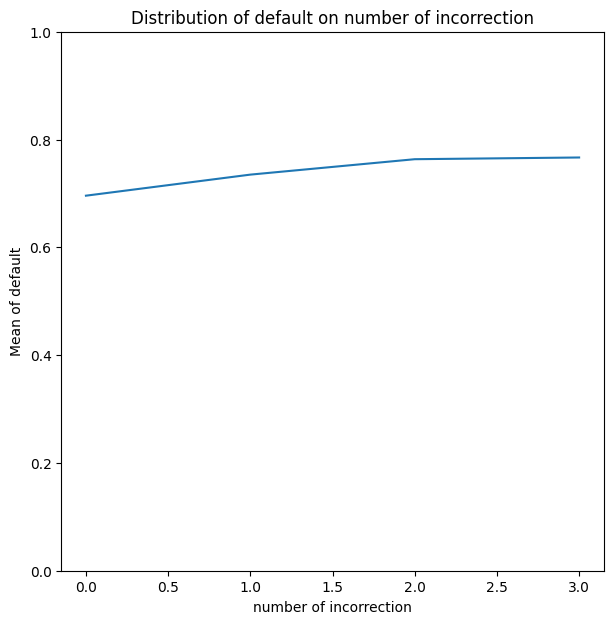

In [14]:
fig ,ax = plt.subplots(figsize=(7,7))
ax.plot(np.arange(0,4),incorrect_means)
ax.set_ylim(0,1)
ax.set_ylabel('Mean of default')
ax.set_xlabel('number of incorrection')
ax.set_title('Distribution of default on number of incorrection')
plt.show()
plt.close()

In [15]:
output_path = './output/DA_EXC/' 
try:
    _=os.listdir(output_path)
except:
    os.mkdir(output_path)


In [16]:
for i in range(4):
    cons_wrong_idc = wrong_sum[wrong_sum>i].index
    cons_wrong = df_original.loc[cons_wrong_idc]
    cons_wrong.to_csv(output_path+f'{i}-times_wrong_samples.csv')